In [293]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa

from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [294]:
img_path = keras.utils.get_file(
    "flower.jpg", "https://upload.wikimedia.org/wikipedia/commons/8/86/Flower-04-KayEss-2.jpeg"
)

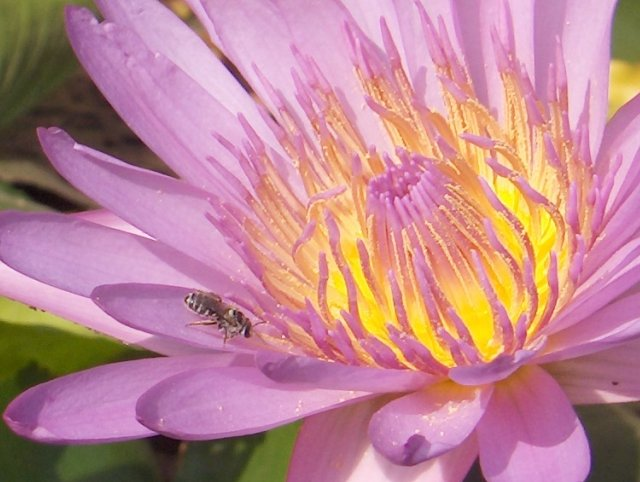

In [295]:
display(Image(img_path))

In [296]:
preprocess_input = keras.applications.xception.preprocess_input

def get_img_array(img_path, size):
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    array = keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

In [297]:
img_size = (244,244)
img_array = preprocess_input(get_img_array(img_path, size=img_size))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


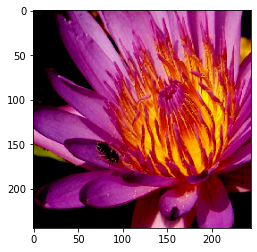

In [298]:
import matplotlib.pyplot as plt
plt.imshow(img_array[0])

In [299]:
img = tf.data.Dataset.from_tensor_slices(img_array)


In [300]:
def black_box_augmentation(img, ratio):
    
    """ 
        Augment images with centered black box. 
        
            param: tensor img: A image in the form of a Tensorflow tensor
            param: float ratio: How large share of the image that should be augmented with a black box
    
    """
        
    X_len, Y_len, RGB = img.shape
    center_offset = ((X_len // 2), (Y_len // 2))
    ratio = tf.cast(ratio, tf.float32)
    box_area = tf.cast((tf.pow(X_len,2) ), tf.float32)
    square_len = tf.sqrt(box_area * ratio)
    square_len = tf.cast(square_len, tf.int32)
    
    img = tf.expand_dims(img, axis = 0)
    
    augmented_img = tfa.image.cutout(images = img, mask_size = square_len, offset = center_offset)
    
    return tf.squeeze(augmented_img)
    
        
    
    

In [301]:
augmented_img = img.map(lambda img: black_box_augmentation(img, 0.1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


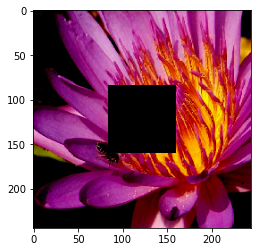

In [302]:
for i in augmented_img:
    plt.imshow(i)